<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S4_4_Adaboost_ou_XGBoost_Exercice_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaboost ou XGBoost ?

Deux algorithmes de boosting connus sont Adaboost & XGBoost, voyons voir la performance de chacun de ces algorithmes sur le dataset d'AIRBNB Seattle. Notre but va être de prédire le prix d'un appartement en fonction des caractéristiques qu'on nous a donné. 

1. Importez les librairies usuelles 

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

2. Importez le dataset ```listings.csv```

In [0]:
listings = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/S4-3%20--%20Boosting%20-%20Adaboost%20%26%20XGBoost/S4-3B/Dataset/listings.csv?token=AFB53D5KJEPWSDQHLUKIF2K5T4HZE")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

3. On a beaucoup de données dans ce dataset. Affichez toutes les colonnes du dataset

In [0]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

4. Révisons un peu Seaborn, affichez la distribution des prix dans le dataset 

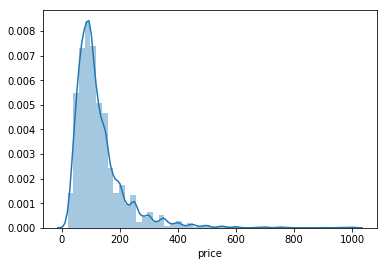

In [0]:
listings.price = listings.price.apply(lambda x: x[1:])
listings.price = listings.price.replace("1,000.00", "1000").astype(float)
sns.distplot(listings.price)

5. Supprimez les outliers pour ne garder que les appartements qui ont un prix inférieur à 400$/nuit 

In [0]:
avg_priced_dataset = listings[listings.price <= 400]
avg_priced_dataset.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.755000e+03,3.755000e+03,3.755000e+03,3753.000000,3753.000000,3755.000000,3755.000000,3755.000000,3739.000000,3749.000000,3754.000000,96.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3119.000000,3108.000000,3113.000000,3108.000000,3115.000000,3111.000000,3110.000000,0.0,3755.000000,3138.000000
mean,5.556910e+06,2.016010e+13,1.579411e+07,7.146283,7.146283,47.628887,-122.332935,3.272703,1.236026,1.270739,1.690730,836.437500,120.749933,1.639414,2.365113,780.472703,16.821305,36.885220,58.189880,244.672703,22.443675,94.517153,9.635135,9.552843,9.784106,9.807705,9.607522,9.452412,NaN,2.944607,2.096539
std,2.966011e+06,0.000000e+00,1.459490e+07,28.711382,28.711382,0.043270,0.031759,1.868531,0.556459,0.824873,1.056105,650.483429,68.744681,1.236517,16.441420,1696.449365,12.161880,23.306987,34.007566,126.911684,37.980257,6.597540,0.700417,0.801180,0.599360,0.571147,0.629853,0.749495,NaN,5.882812,1.827941
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.256584e+06,2.016010e+13,3.258368e+06,1.000000,1.000000,47.609078,-122.354154,2.000000,1.000000,1.000000,1.000000,415.000000,75.000000,1.000000,1.000000,60.000000,2.000000,13.500000,29.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.700000
50%,6.127974e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623451,-122.328750,2.000000,1.000000,1.000000,1.000000,750.000000,100.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.560000
75%,8.047928e+06,2.016010e+13,2.592334e+07,3.000000,3.000000,47.662976,-122.310698,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.020000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,10.000000,3000.000000,400.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


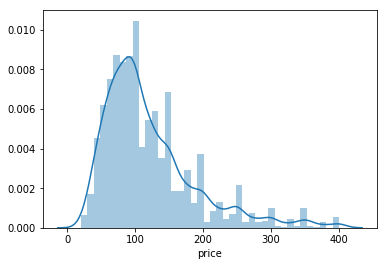

In [0]:
sns.distplot(avg_priced_dataset.price)

6. Exprimez le prix en fonction des variables suivantes : 

- ```room type```
- ```beds```
- ```property type```

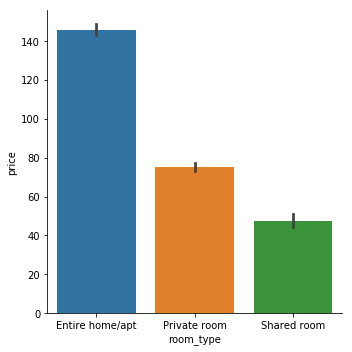

In [0]:
sns.catplot(x="room_type", y="price", data=avg_priced_dataset, kind="bar")

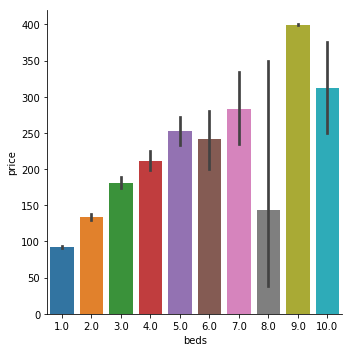

In [0]:
sns.catplot(x="beds", y="price", data=avg_priced_dataset, kind="bar")

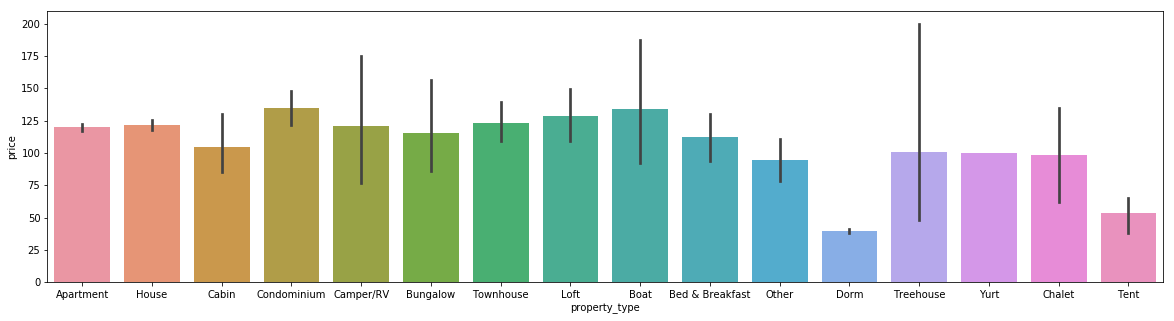

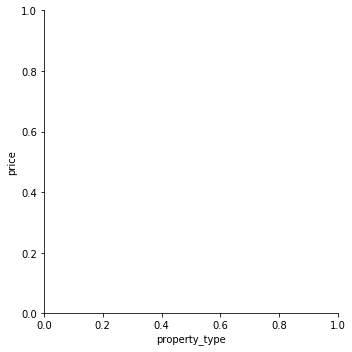

In [0]:
fig, ax = plt.subplots(figsize=(20,5))
sns.catplot(x="property_type", y="price", data=avg_priced_dataset, kind="bar", ax=ax)

7. Séparez la variable cible de votre dataset

In [0]:
X = avg_priced_dataset.loc[:, avg_priced_dataset.columns!="price"]
y = avg_priced_dataset.loc[:, avg_priced_dataset.columns=="price"]

8. Il faut qu'on écrème quelques variables explicatives de notre jeu de données. Commencer par simplement enlever les variables qui expriment un ```id``` quelconque ou urls. On enlèvera également les variables qui contiennent des textes longs comme ```notes```

De la même manière, on enlèvera  toutes les variables qui décrivent le prix mensuel ou hebdomadaire comme  ```monthly price```

Votre dataset devrait contenir uniquement les variables catégoriques et numériques une fois votre nettoyage fait. 

A la fin, votre dataset contiendra les variables suivantes : 

```
Index(['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')
```

In [0]:
a=X.isnull().sum()/X.shape[0]*100
a.sort_values(ascending=False)

license                             100.000000
square_feet                          97.443409
monthly_price                        60.053262
security_deposit                     51.504660
weekly_price                         47.270306
notes                                42.210386
cleaning_fee                         27.217044
neighborhood_overview                27.030626
transit                              24.474035
host_about                           22.556591
host_acceptance_rate                 19.946738
review_scores_accuracy               17.230360
review_scores_checkin                17.230360
review_scores_value                  17.177097
review_scores_location               17.150466
review_scores_cleanliness            17.097204
review_scores_communication          17.043941
review_scores_rating                 16.937417
last_review                          16.431425
first_review                         16.431425
reviews_per_month                    16.431425
space        

In [0]:
X_clean = X.drop(["host_since", 
            "host_location", 
            "host_about", 
            "host_thumbnail_url", 
            "host_picture_url",
           "license",
           "monthly_price",
           "square_feet",
            "host_verifications", 
        "street", 
        "neighbourhood", 
        "neighbourhood_cleansed", 
        "city", 
        "state", 
        "market", 
        "smart_location",
        "country_code",
        "country",
        "is_location_exact",
        "amenities",
        "jurisdiction_names",
        "first_review",
        "last_review",
        "calendar_last_scraped",
        "weekly_price",
            "notes",
                  "neighborhood_overview",
         "name",
                  "description",
                  "listing_url" ,
"host_id",
"host_url",
                 "scrape_id",
                 "space",
                 "picture_url",
                 "last_scraped",
                 "host_name",
                 "medium_url",
                 "summary",
                 "xl_picture_url",
                 "transit",
                 "thumbnail_url",
                 "host_neighbourhood",
                 "zipcode",
                 "calendar_updated",
                 "license","id"], axis=1)

9 Reste-t-il des valeurs manquantes? Certaines peuvent elles être traîtées sans avoir recours à l'interpolation ? Les variables sont elles toutes dans un format adapté ? Si non appliquez des transformations adaptées.

In [0]:
X_clean.isnull().sum().sort_values()

experiences_offered                    0
calculated_host_listings_count         0
minimum_nights                         0
maximum_nights                         0
has_availability                       0
availability_30                        0
availability_60                        0
guests_included                        0
availability_90                        0
number_of_reviews                      0
requires_license                       0
instant_bookable                       0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
availability_365                       0
bed_type                               0
extra_people                           0
accommodates                           0
room_type                              0
longitude                              0
latitude                               0
neighbourhood_group_cleansed           0
property_type                          1
beds            

In [0]:
# Pour la suite, nous remplirons les valeurs NaN de la manière la plus simple possible 
X_clean.cleaning_fee = X_clean.cleaning_fee.apply(lambda x: float(x[1:])/100 if type(x) == str else x)
X_clean.cleaning_fee = X_clean.cleaning_fee.fillna(0)

In [0]:
# Nous devons enlever le caractère $ de chacun des prix pour rendre les variables numériques
X_clean["host_response_rate_clean"] = X_clean.host_response_rate.apply(lambda x: float(x[:-1])/100 if type(x) == str else x)
X_clean = X_clean.drop("host_response_rate", axis =1)


In [0]:
X_clean["host_acceptance_rate_clean"] = X_clean.host_acceptance_rate.apply(lambda x: int(x[:-1])/100 if type(x) == str else x)
X_clean = X_clean.drop("host_acceptance_rate", axis = 1)

In [0]:
X_clean.host_has_profile_pic = X_clean.host_has_profile_pic.fillna("f")
X_clean.host_identity_verified = X_clean.host_identity_verified.fillna("f")

X_clean.host_response_time = X_clean.host_response_time.fillna("Unknown")
X_clean.host_is_superhost = X_clean.host_is_superhost.fillna("Unknown")
X_clean.property_type = X_clean.property_type.fillna("unknown")

X_clean.extra_people = X_clean.extra_people.apply(lambda x: float(x[1:]))
X_clean.security_deposit = X_clean.security_deposit.apply(lambda x: float(str(x).replace(",","").replace("nan","$0")[1:]))
X_clean.security_deposit = X_clean.security_deposit.fillna(0)


10. Vérifiez que toutes les variables numériques le sont effectivement bien. (N'oubliez pas de regarder y)

In [0]:
y = y.apply(lambda x: float(x[1:]) if type(x)==str else x)

11. Séparez les variables en deux groupes, les variables numériques d'un côté et les qualitatives de l'autre.

In [0]:
num_col = X_clean.select_dtypes([np.number]).columns
cat_col = X_clean.select_dtypes("object").columns

X_num = X_clean[num_col]
X_cat =  pd.get_dummies(X_clean[cat_col])

12. Faites maintenant un ```train_test_split```

In [0]:
from sklearn.model_selection import train_test_split



X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y, test_size =0.2)

In [0]:
X_train_cat.shape

(3004, 66)

13. Normalisez ```X_train_num``` & ```X_test_num``` et rassemblez les deux groupes de variables

In [0]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()


X_train_num_norm = pd.DataFrame(sc_x.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_test_num_norm = pd.DataFrame(sc_x.transform(X_test_num),columns=X_test_num.columns, index = X_test_num.index)

X_train = pd.merge(X_train_num_norm, X_train_cat,left_index=True, right_index=True)
X_test = pd.merge(X_test_num_norm, X_test_cat,left_index=True, right_index=True)



14. Gérez les valeurs NaN. Utilisez les stratégies que vous préférez 

In [0]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


     |████████████████████████████████| 51kB 6.4MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_

15. Entrainez d'abord un modèle d'Adaboost standard et regardez votre score 


In [0]:

from sklearn.ensemble import AdaBoostRegressor 
regressor_ada = AdaBoostRegressor()
regressor_ada.fit(X_train, y_train)
regressor_ada.score(X_test, y_test)

np.sqrt(np.mean((regressor_ada.predict(X_test) - y_test.values)**2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.3691122084634

In [0]:
AdaBoostRegressor?

In [0]:
np.mean(y_test)

price    115.772304
dtype: float64

16. Entrainez ensuite un modèle XGBoost et regardez votre score 

In [0]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, y_train)
regressor_xgb.score(X_test, y_test)

[07:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6295058756743492

17. Par défaut, Adaboost prend des decision trees comme modèle a booster. Tentez de mettre une regression linéaire 

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
regressor_ada = AdaBoostRegressor(lin_reg)
regressor_ada.fit(X_train, y_train)
regressor_ada.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-563347451.5751352

In [0]:
regressor_ada.score(X_train, y_train)


0.6634775816216779

18. La régression linéaire n'était pas la meilleure idée mais peut être qu'on peut faire une grid_search sur le ```learning rate``` & ```n_estimators```pour rattraper le score de XGBoost ?

In [0]:
from sklearn.model_selection import GridSearchCV
regressor_ada = AdaBoostRegressor()
parameters = {'n_estimators':[40,50,70, 100, 150, 200],
              "learning_rate":[1.0, 0.9, 0.8, 0.7, 0.6, 0.5]}

regressor_ada_best = GridSearchCV(regressor_ada, parameters)
regressor_ada_best.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5],
                         'n_estimators': [40, 50, 70, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
regressor_ada_best.best_params_

{'learning_rate': 0.5, 'n_estimators': 40}

In [0]:
regressor_ada_best.best_estimator_.score(X_test,y_test)

0.5025760617765047

---> Même avec beaucoup plus d'estimateurs, nous n'arrivons pas au score de XGBoost